In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython.display import Audio

tfrecords_filename = 'nsynth-train.tfrecord'

C:\Users\gjcol\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def nsynth_generator(tfrecords_filename):
    for serialized_example in tf.python_io.tf_record_iterator(tfrecords_filename):
        example = tf.train.Example()
        example.ParseFromString(serialized_example)
        f = example.features.feature

        audio = np.array(f['audio'].float_list.value)

        data = {
            'note':
                f['note'].int64_list.value[0],
            'note_str':
                f['note_str'].bytes_list.value[0],
            'instrument':
                f['instrument'].int64_list.value[0],
            'instrument_str':
                f['instrument_str'].bytes_list.value[0],
            'pitch':
                f['pitch'].int64_list.value[0],
            'velocity':
                f['pitch'].int64_list.value[0],
            'samplerate':
                f['sample_rate'].int64_list.value[0],
            'qualities':
                map(int, f['qualities'].int64_list.value),
            'qualities_str':
                map(str, f['qualities_str'].int64_list.value),
            'instrument_family':
                f['instrument_family'].int64_list.value[0],
            'instrument_family_str':
                f['instrument_family_str'].bytes_list.value[0],
            'instrument_source':
                f['instrument_family'].int64_list.value[0],
            'instrument_source_str':
                f['instrument_source_str'].bytes_list.value[0],
        }
        yield data, audio

In [3]:
gen_samples = nsynth_generator(tfrecords_filename)
metadata, audio = gen_samples.__next__()
print(metadata)

NotFoundError: NewRandomAccessFile failed to Create/Open: nsynth-train.tfrecord : The system cannot find the file specified.
; No such file or directory

(0, 8000)

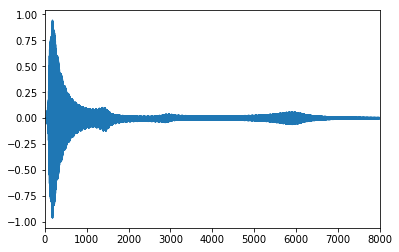

In [26]:
Audio(audio, rate=metadata['samplerate'])
plt.plot(audio)
plt.xlim(0,8000)